# Download bird songs
A script to download bird sound files from the www.xeno-canto.org archives with metadata
The program downloads all the files found with the search terms into subdirectory data/xeno-canto-dataset/searchTerm with corresponding json files.


In [1]:
import urllib.request, json
import sys
import os

savePath="data/xeno-canto-dataset-full-all-Countries/"

## Defining necessary functions
* Creates the subdirectory data/xeno-canto-dataset if necessary
* Downloads and saves json files for number of pages in a query
* and directory path to saved json's

In [2]:
def save_json(searchTerms, birdName, country):
    numPages = 1
    page = 1
    # create a path to save json files and recordings
    path = savePath + birdName.replace(':', '') + "/" + country
    if not os.path.exists(path):
        print("Creating subdirectory " + path + " for downloaded files...")
        os.makedirs(path)
        # download a json file for every page found in a query
    while page < numPages + 1:
        print("Loading page " + str(page) + "...")
        url = 'https://www.xeno-canto.org/api/2/recordings?query={0}&page={1}'.format(searchTerms.replace(' ', '%20'),
                                                                                      page)
        print(url)
        jsonPage = urllib.request.urlopen(url)
        jsondata = json.loads(jsonPage.read().decode('utf-8'))
        filename = path + "/jsondata_p" + str(page) + ".json"
        with open(filename, 'w') as outfile:
            json.dump(jsondata, outfile)
        # check number of pages
        numPages = jsondata['numPages']
        page = page + 1
    print("Found ", numPages, " pages in total.")
    # return number of files in json
    # each page contains 500 results, the last page can have less than 500 records
    print("Saved json for ", (numPages - 1) * 500 + len(jsondata['recordings']), " files")
    return path


# read the json and return the list of values for selected json part
# i.e. "id" - ID number, "type": type of the bird sound such as call or song
# for all Xeno Canto files found with the given search terms.
def read_data(searchTerm, path):
    data = []
    numPages = 1
    page = 1
    # read all pages and save results in a list
    while page < numPages + 1:
        # read file
        with open(path + "/jsondata_p" + str(page) + ".json", 'r') as jsonfile:
            jsondata = jsonfile.read()
        jsondata = json.loads(jsondata)
        # check number of pages
        numPages = jsondata['numPages']
        # find "recordings" in a json and save a list with a search term
        for k in range(len(jsondata['recordings'])):
            data.append(jsondata["recordings"][k][searchTerm])
        page = page + 1
    return data


# download all sound files found with the search terms into xeno-canto directory
# into catalogue named after the search term (i.e. Apus apus)
# filename have two parts: the name of the bird in latin and ID number
def download(searchTerms, birdName, country):
    # create data/xeno-canto-dataset directory
    path = save_json(searchTerms, birdName, country)
    # get filenames: recording ID and bird name in latin from json
    filenamesID = read_data('id', path)
    filenamesCountry = read_data('cnt', path)
    # get website recording http download address from json
    fileaddress = read_data('file', path)
    numfiles = len(filenamesID)
    print("A total of ", numfiles, " files will be downloaded")
    for i in range(0, numfiles):
        print("Saving file ", i + 1, "/", numfiles,
              savePath + birdName.replace(':', '') + filenamesID[
                  i] + ".mp3")
        urllib.request.urlretrieve("http:" + fileaddress[i],
                                   path + "/" + birdName + filenamesID[i] + ".mp3")

## Download
Example download with all sounds type song, from bird list recorded in selected countries 

*example query*: query = "Dendrocopos major cnt:Poland type:song"
can be downloaded as:

download(query)

Other options can be specified according to xeno-canto query list
http://www.xeno-canto.org/explore?query=common+snipe

In [4]:
countries = ['Indonesia', 'Malaysia', 'Philippines', 'Thailand', 'Vietnam', 'Singapore','Myanmar']
birds = ['Otus jolandae',
         'Otus magicus',
         'Otus lempiji',
         'Otus manadensis',
         'Otus rufescens',
         'Otus silvicola',
         'Otus angelinae']

for country in countries:
    for bird in birds:
        download(bird + ' cnt:' + country + ' type:song', bird.replace(' ', ''), country)
for bird in birds:
    download(bird + ' type:song', bird.replace(' ', ''), 'countries')

Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Otus%20jolandae%20cnt:Myanmar%20type:song&page=1
Found  1  pages in total.
Saved json for  0  files
A total of  0  files will be downloaded
Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Otus%20magicus%20cnt:Myanmar%20type:song&page=1
Found  1  pages in total.
Saved json for  0  files
A total of  0  files will be downloaded
Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Otus%20lempiji%20cnt:Myanmar%20type:song&page=1
Found  1  pages in total.
Saved json for  0  files
A total of  0  files will be downloaded
Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Otus%20manadensis%20cnt:Myanmar%20type:song&page=1
Found  1  pages in total.
Saved json for  0  files
A total of  0  files will be downloaded
Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Otus%20rufescens%20cnt:Myanmar%20type:song&page=1
Found  1  pages in total.
Saved json for  0  files

Saving file  9 / 19 data/xeno-canto-dataset-full-all-Countries/Otusmanadensis415129.mp3
Saving file  10 / 19 data/xeno-canto-dataset-full-all-Countries/Otusmanadensis203439.mp3
Saving file  11 / 19 data/xeno-canto-dataset-full-all-Countries/Otusmanadensis152042.mp3
Saving file  12 / 19 data/xeno-canto-dataset-full-all-Countries/Otusmanadensis120923.mp3
Saving file  13 / 19 data/xeno-canto-dataset-full-all-Countries/Otusmanadensis120922.mp3
Saving file  14 / 19 data/xeno-canto-dataset-full-all-Countries/Otusmanadensis88276.mp3
Saving file  15 / 19 data/xeno-canto-dataset-full-all-Countries/Otusmanadensis70298.mp3
Saving file  16 / 19 data/xeno-canto-dataset-full-all-Countries/Otusmanadensis18815.mp3
Saving file  17 / 19 data/xeno-canto-dataset-full-all-Countries/Otusmanadensis194392.mp3
Saving file  18 / 19 data/xeno-canto-dataset-full-all-Countries/Otusmanadensis95327.mp3
Saving file  19 / 19 data/xeno-canto-dataset-full-all-Countries/Otusmanadensis95326.mp3
Creating subdirectory data/

In [9]:
from pydub import AudioSegment

files_path = "data/xeno-canto-dataset-full-all-Countries/Otusrufescens/countries/"
file_name = 'Otusrufescens19108'

# Opening file and extracting segment
song = AudioSegment.from_mp3( files_path+file_name+'.mp3' )

In [10]:
song

In [11]:
startMin = 0
startSec = 55

endMin = 1
endSec = 0

# Time to miliseconds
startTime = startMin*60*1000+startSec*1000
endTime = endMin*60*1000+endSec*1000

# Opening file and extracting segment
#song = AudioSegment.from_mp3( files_path+file_name+'.mp3' )
extract = song[startTime:endTime]
extract

In [12]:
extract.export( files_path+file_name+'-extract7.mp3', format="mp3")

<_io.BufferedRandom name='data/xeno-canto-dataset-full-all-Countries/Otusrufescens/countries/Otusrufescens19108-extract7.mp3'>

In [14]:
import pydub
sound = pydub.AudioSegment.from_mp3('data/xeno-canto-dataset-full-all-Countries/Otusrufescens/countries/Otusrufescens68944.mp3')
sound.export('data/xeno-canto-dataset-full-all-Countries/Otusrufescens/countries/Otusrufescens68944_wav.wav', format='wav')

<_io.BufferedRandom name='data/xeno-canto-dataset-full-all-Countries/Otusrufescens/countries/Otusrufescens68944_wav.wav'>

In [16]:
# Using scipy
from scipy.io import wavfile
rate, data = wavfile.read('data/xeno-canto-dataset-full-all-Countries/Otusrufescens/countries/Otusrufescens68944_wav.wav')
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", data.shape)
print(data)

Sampling (frame) rate =  44100
Total samples (frames) =  (3923483,)
[ -7142 -11564 -14345 ...   3725   4048   2702]


In [17]:
import matplotlib.pyplot as plt 
plt.plot(data, '-', );

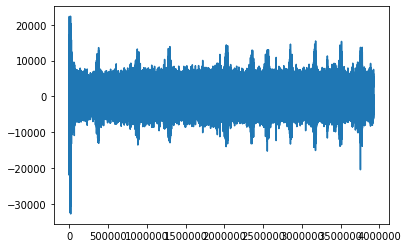

In [18]:
plt.plot(data, '-', );